dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


0.37388724035608306

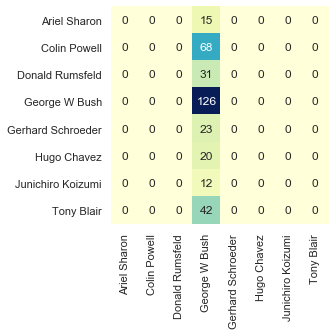

In [4]:
from sklearn.svm import SVC;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
from sklearn.datasets import fetch_lfw_people;import numpy as np;from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline;from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix;from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
faces = fetch_lfw_people(min_faces_per_person=60)
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)
pca = PCA(n_components=150, whiten=True, random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
print(svc.get_params().keys())
modelo=make_pipeline(pca,svc)
params_grid={'svc__C':[1, 5, 10, 50],'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid=GridSearchCV(modelo,params_grid)
grid.fit(Xtrain,ytrain)
modelo=grid.best_estimator_
ymodelo=modelo.predict(Xtest)
mat=confusion_matrix(ytest,ymodelo)
sns.heatmap(mat,square=True,annot=True,cmap='YlGnBu',fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
accuracy_score(ytest,ymodelo)     
        


In [1]:
#####

In [18]:
import pandas as pd;import numpy as np

info=pd.read_csv('C:\\Users\\SONY\\Desktop\\NumPy\\student-mat.csv')
info2=info.loc[:,'school':'guardian']
def cap(X):
    return X.capitalize()

info2['Mjob']=info2.Mjob.apply(cap)
info2['Fjob']=info2.Fjob.apply(cap)
print(info2)


def mayoria(X):
    if(X>17):
        return True
    else:
        return False
def veces10(x):
    if(type(x) is int):
        return x*10
    else:
        return x
    
info2['Edad_legal']=info2.age.apply(mayoria)
info2.applymap(veces10)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   At_home   Teacher   
1       GP   F   17       U     GT3       T     1     1   At_home     Other   
2       GP   F   15       U     LE3       T     1     1   At_home     Other   
3       GP   F   15       U     GT3       T     4     2    Health  Services   
4       GP   F   16       U     GT3       T     3     3     Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  Services  Services   
391     MS   M   17       U     LE3       T     3     1  Services  Services   
392     MS   M   21       R     GT3       T     1     1     Other     Other   
393     MS   M   18       R     LE3       T     3     2  Services     Other   
394     MS   M   19       U     LE3       T     1     1     Other   At_home   

     reason guardian  
0    course   mother  
1    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,Edad_legal
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,200,U,LE3,A,20,20,Services,Services,course,other,True
391,MS,M,170,U,LE3,T,30,10,Services,Services,course,mother,False
392,MS,M,210,R,GT3,T,10,10,Other,Other,course,other,True
393,MS,M,180,R,LE3,T,30,20,Services,Other,course,mother,True
